In [1]:
import pandas as pd
import numpy as np
import keras
import livelossplot


##### Data from: https://www.kaggle.com/datasets/moltean/fruits
 Using the 100x100 image versions

In [ ]:
seed = 0
tensorflow.randomseed

In [13]:
import os
cwd = os.getcwd()

cwd

'/Users/koa/Documents/ML Course/cnn'

In [30]:
tr_path = '/fruits-360/Training'
te_path = '/fruits-360/Test'

In [31]:
tr_dir = cwd+tr_path
te_dir = cwd+te_path

In [32]:
tr_dir

'/Users/koa/Documents/ML Course/cnn/fruits-360/Training'

In [42]:
from keras.utils import image_dataset_from_directory
import os


train = image_dataset_from_directory(tr_dir, 
                                 labels = 'inferred',
                                 label_mode = 'categorical', 
                                 color_mode='rgb', 
                                 image_size=(100,100))

train.class_names
test = image_dataset_from_directory(te_dir, 
                                 labels = 'inferred',
                                 label_mode = 'categorical', 
                                 color_mode='rgb', 
                                 image_size=(100,100))

Found 70491 files belonging to 141 classes.
Found 23619 files belonging to 141 classes.


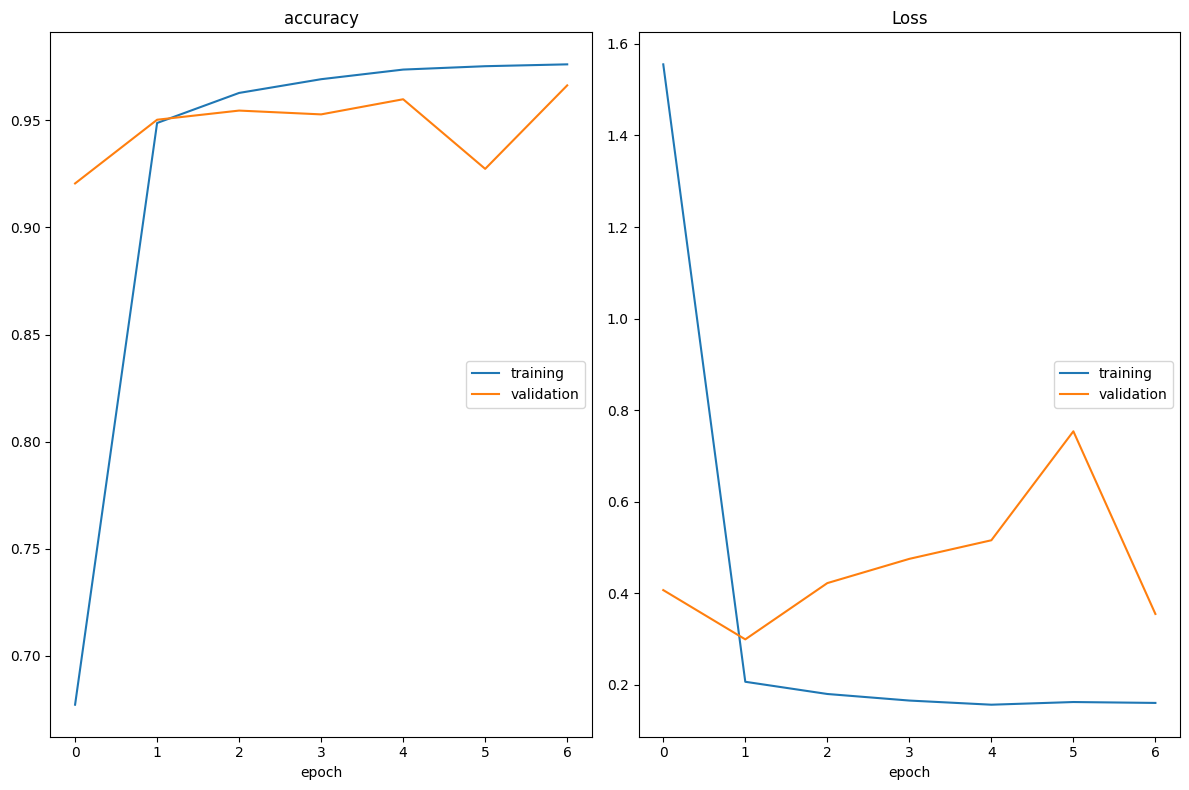

accuracy
	training         	 (min:    0.677, max:    0.976, cur:    0.976)
	validation       	 (min:    0.921, max:    0.966, cur:    0.966)
Loss
	training         	 (min:    0.157, max:    1.555, cur:    0.161)
	validation       	 (min:    0.299, max:    0.754, cur:    0.355)
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 189s 86ms/step - accuracy: 0.9744 - loss: 0.1759 - val_accuracy: 0.9664 - val_loss: 0.3549
Epoch 7: early stopping


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from livelossplot import PlotLossesKeras
import keras

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=2, activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())

model.add(Dense(units=150, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=141, activation='softmax'))


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

optimizer = RMSprop()


model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train, batch_size=32, epochs=50, 
          validation_data = test,
          callbacks=[PlotLossesKeras(),callbacks])



In [45]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 99, 99, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 48, 48, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 23, 23, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 22, 22, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 150)            │     1,161,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 141)            │        21,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,420,068 (9.23 MB)

 Trainable params: 1,210,033 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,210,035 (4.62 MB)